## Import Libraries

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [241]:
df  = pd.read_csv(r"C:\Users\ashuh\Documents\Untitled Folder\Heart Disease Data\heart.csv")
print(df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [243]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

#### 1 - Heart Issue
#### 0 - No Issue

In [244]:
df.duplicated().sum()

723

In [245]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Exploratory Data Analysis and Data Preprocessing as required

In [246]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [247]:
# Changing variable name for EDA
df['sex'] = df['sex'].replace({1: 'M', 0: 'F'}).astype('category')
df['target'] = df['target'].replace({1: 'Y', 0: 'N'}).astype('category')
df['fbs'] = df['fbs'].replace({1: 'Y', 0: 'N'}).astype('category')
df['exang'] = df['exang'].replace({1: 'Y', 0: 'N'}).astype('category')

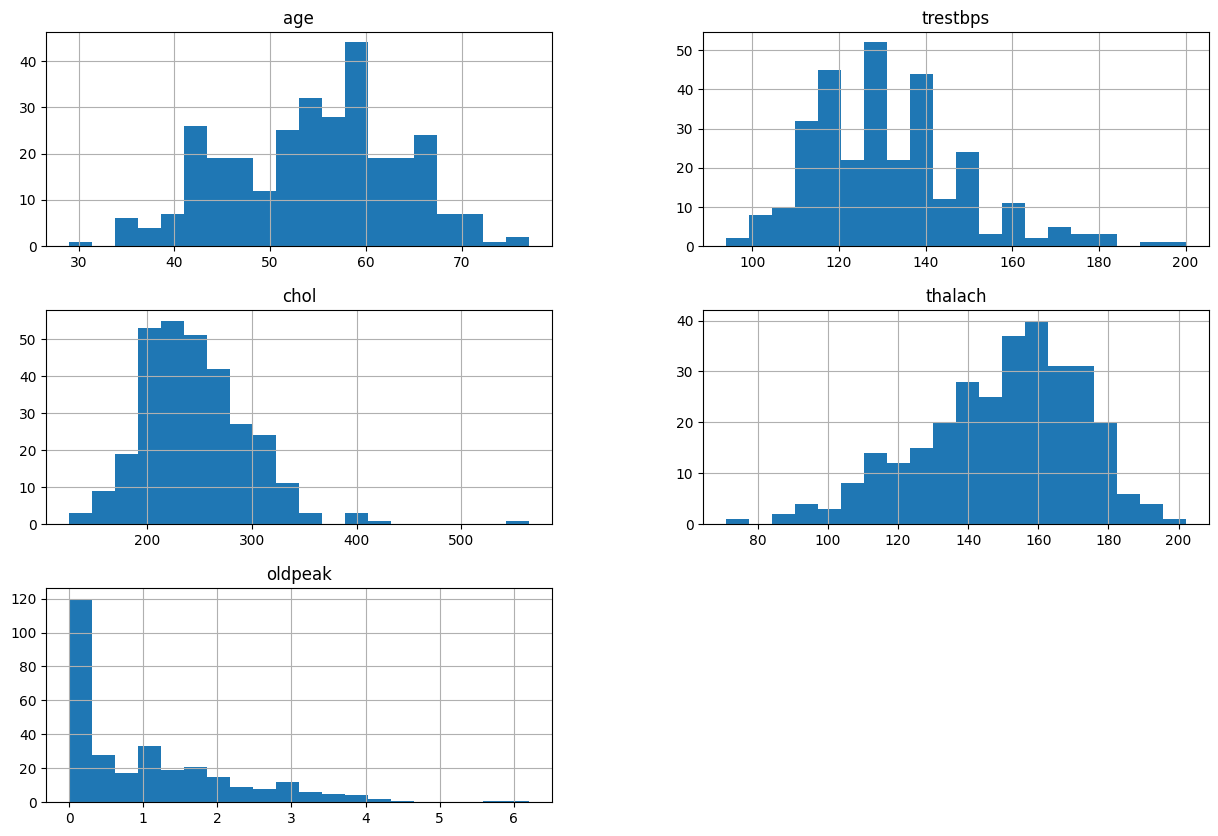

In [248]:
# Plot histograms for numerical variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_vars].hist(bins=20, figsize=(15, 10))
plt.show()

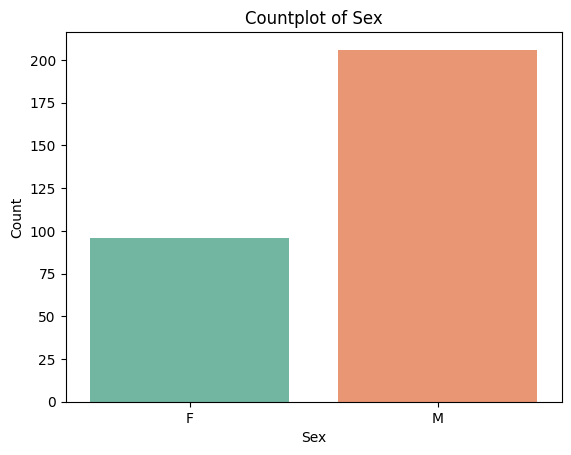

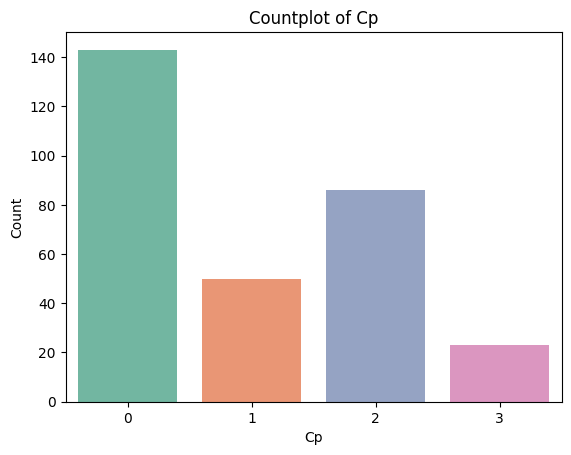

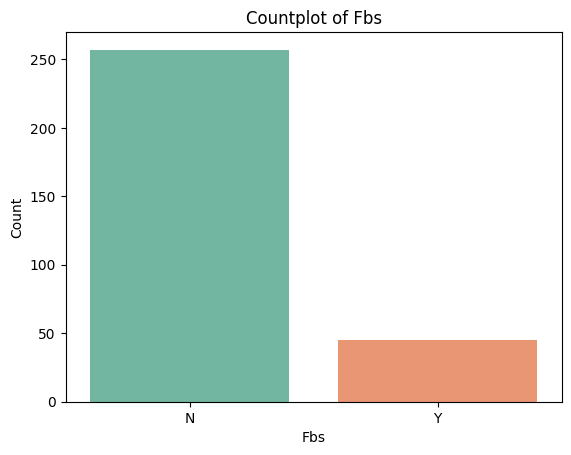

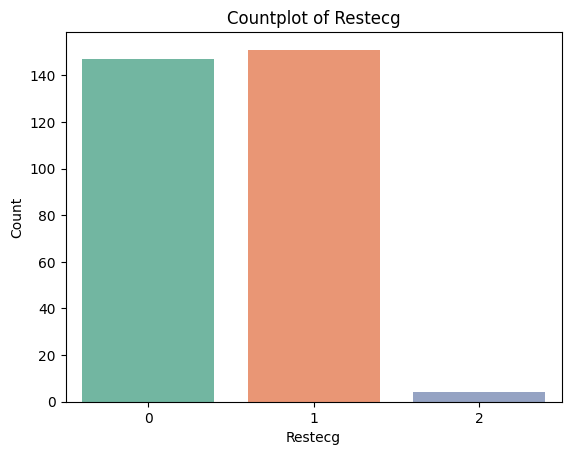

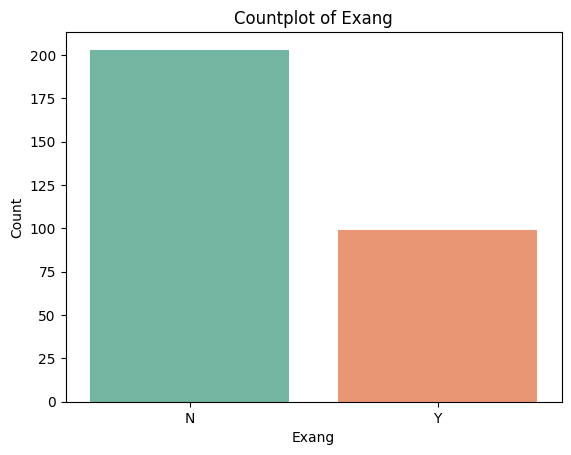

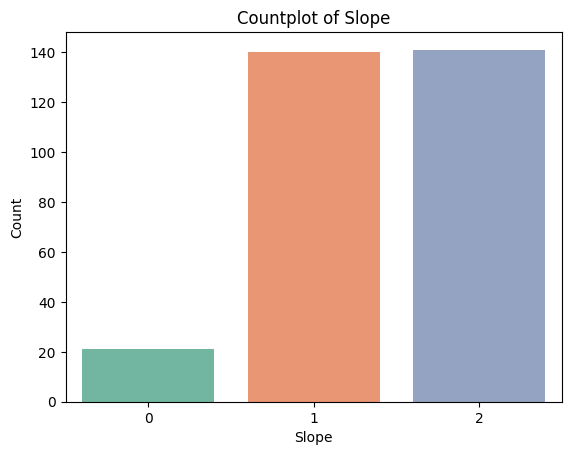

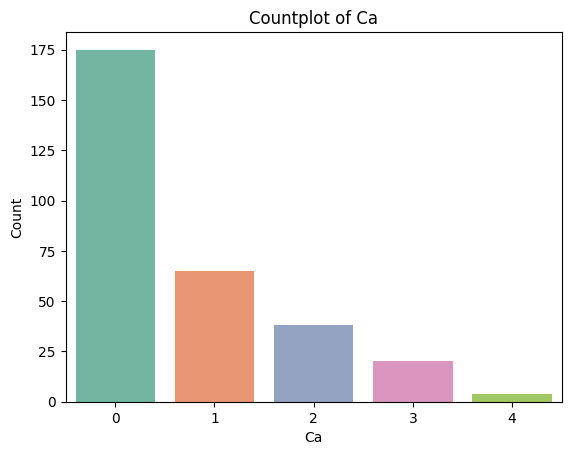

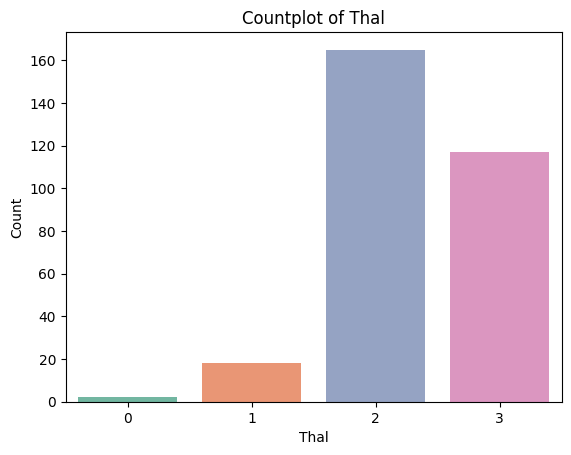

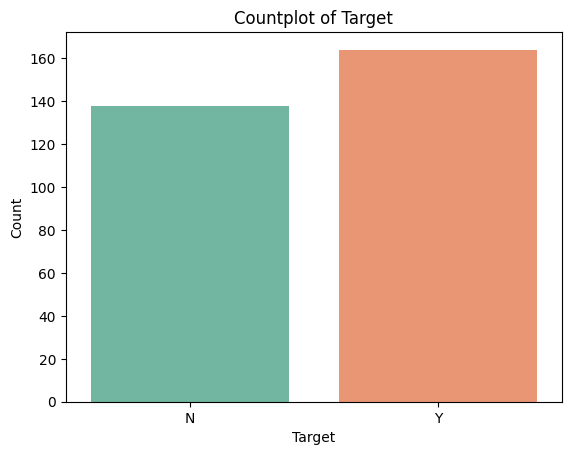

In [249]:
# List of categorical variables to plot countplots for
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Plot countplots for each categorical variable
for var in categorical_vars:
    sns.countplot(x=var, data=df, palette='Set2')  
    plt.title(f'Countplot of {var.capitalize()}')  # Title with the capitalized variable name
    plt.xlabel(var.capitalize())  # X-axis label with the capitalized variable name
    plt.ylabel('Count')  # Y-axis label for count
    plt.show()
    
    # Each iteration of the loop plots a countplot for a categorical variable
    # Titles, labels, and color schemes are customized for each countplot


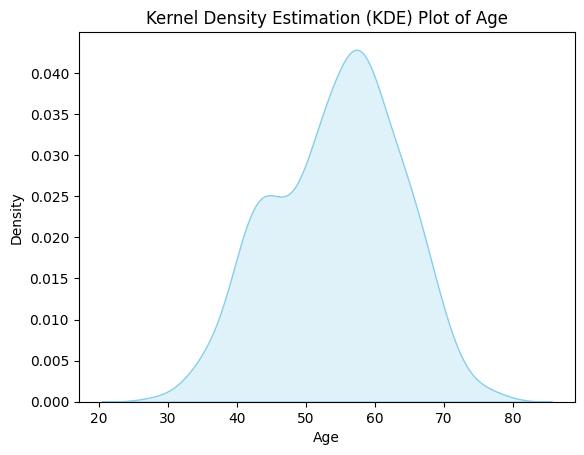

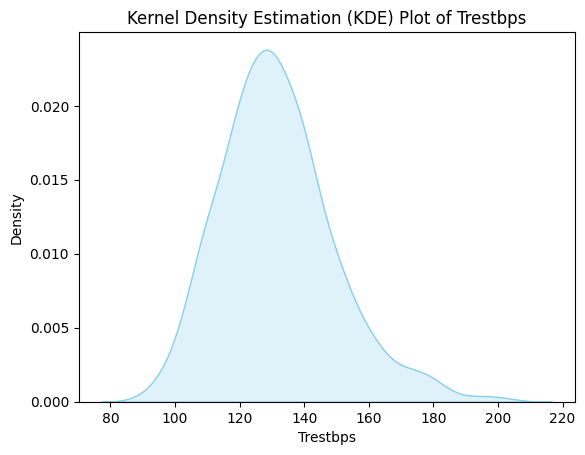

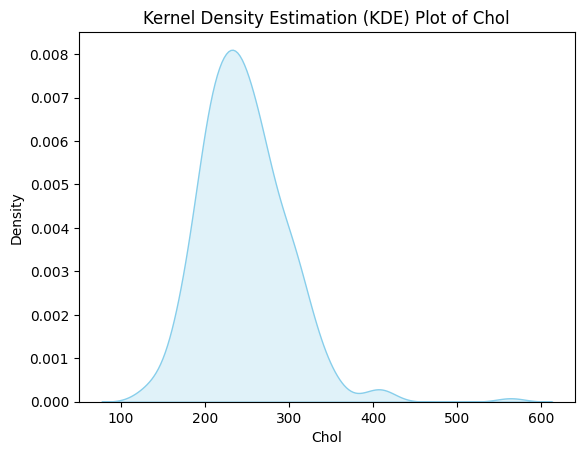

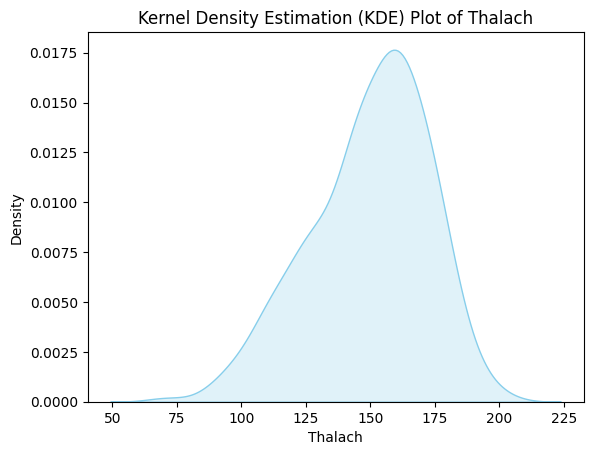

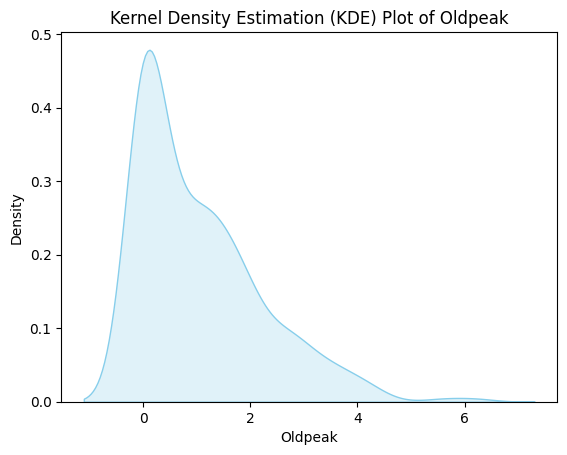

In [250]:
# List of numerical variables to plot KDE plots for
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot KDE plots for each numerical variable
for var in numerical_vars:
    sns.kdeplot(df[var], fill=True, color='skyblue') 
    plt.title(f'Kernel Density Estimation (KDE) Plot of {var.capitalize()}')  # Title with the capitalized variable name
    plt.xlabel(var.capitalize())  # X-axis label with the capitalized variable name
    plt.ylabel('Density')  # Y-axis label for density
    plt.show()

    # Each iteration of the loop plots a KDE plot for a numerical variable
    # The fill parameter is set to True for filled areas under the curve
    # Titles, labels, and color schemes are customized for each KDE plot


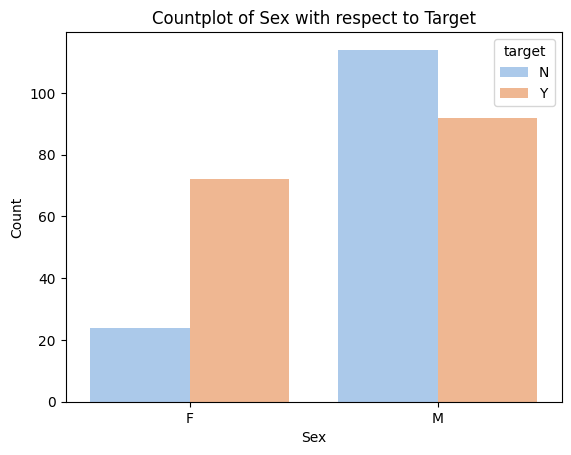

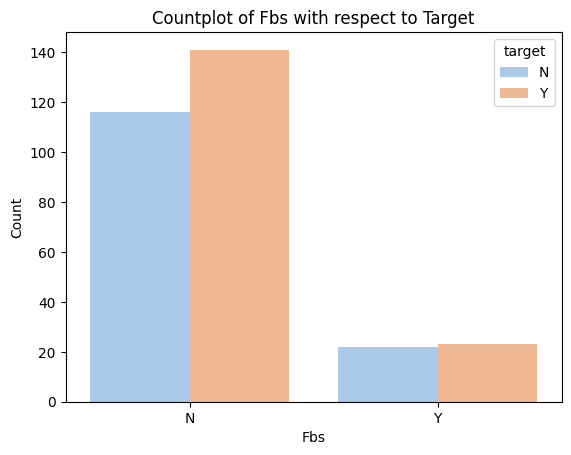

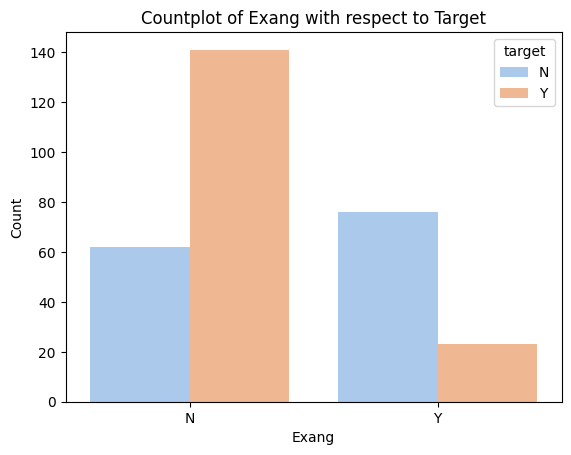

In [251]:
# List of binary variables to plot countplots for
binary_vars = ['sex', 'fbs', 'exang']

# Plot countplots for each binary variable with respect to the 'target' variable
for var in binary_vars:
    sns.countplot(x=var, hue='target', data=df, palette='pastel')
    plt.title(f'Countplot of {var.capitalize()} with respect to Target')  # Title with the capitalized variable name
    plt.xlabel(var.capitalize())  # X-axis label with the capitalized variable name
    plt.ylabel('Count')  # Y-axis label for count
    plt.show()

    # Add comments for better understanding
    # Each iteration of the loop plots a countplot for a binary variable with respect to the 'target' variable
    # Titles, labels, and color schemes are customized for each countplot


## Bivariate Analysis

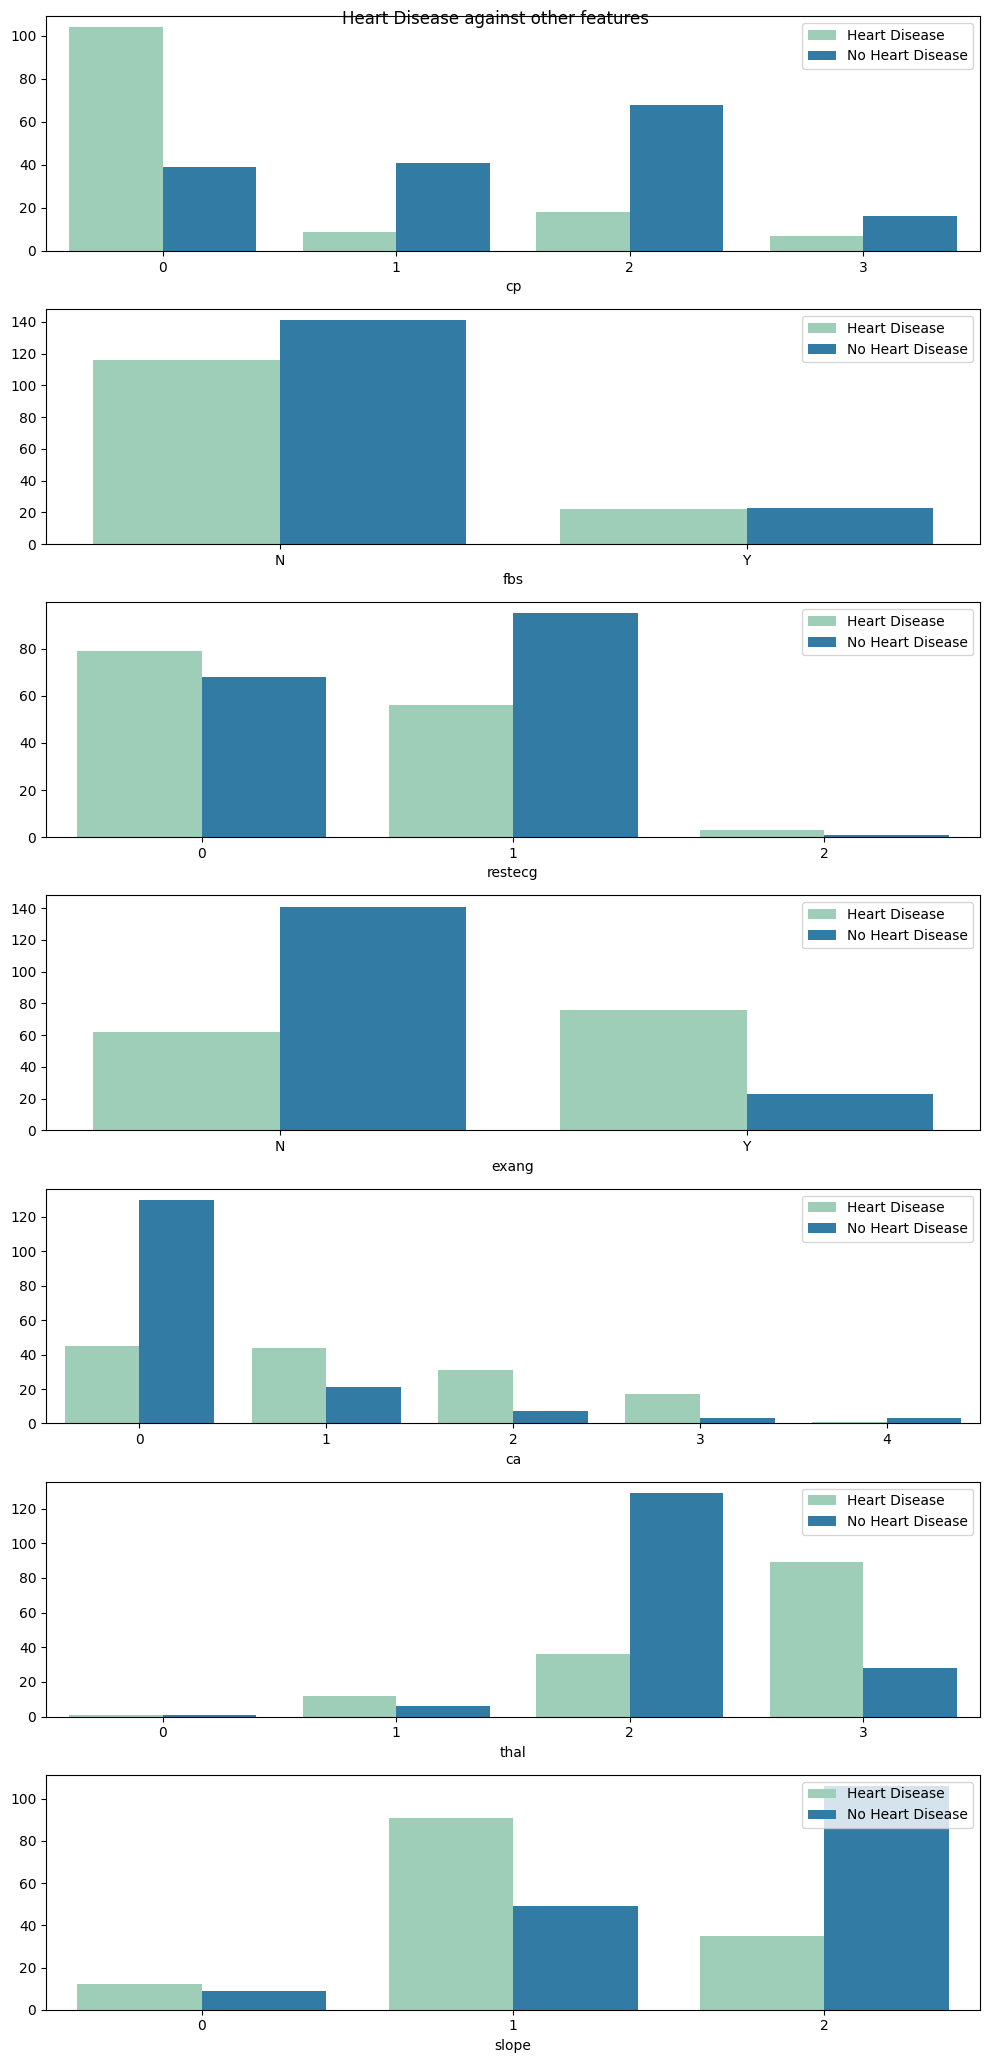

In [252]:
# List of features to count against 'Heart Disease'
countfeature = ["cp", "fbs", "restecg", "exang", "ca", "thal", "slope"]

# Create a list of tuples with the index and feature name
countlist = list(enumerate(countfeature))

# Set up the plot with appropriate size
plt.figure(figsize=(10, 3 * len(countfeature)))

# Set the super title for the overall plot
plt.suptitle("Heart Disease against other features", color='black')

# Loop through the features and plot countplots against 'Heart Disease'
for i in countlist:
    plt.subplot(len(countfeature), 1, i[0] + 1)
    sns.countplot(data=df, x=i[1], hue="target", palette="YlGnBu")
    plt.ylabel("")  # Remove y-axis label for better appearance
    plt.legend(['Heart Disease', 'No Heart Disease'], loc='upper right', prop={'size': 10})  # Legend for clarity

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Add comments for better understanding
# The code creates countplots for each specified feature against the 'Heart Disease' target variable
# Legends are added to indicate 'Heart Disease' and 'No Heart Disease'
# Subplots are arranged vertically for better visualization
# The super title and layout adjustments enhance the overall appearance of the plot


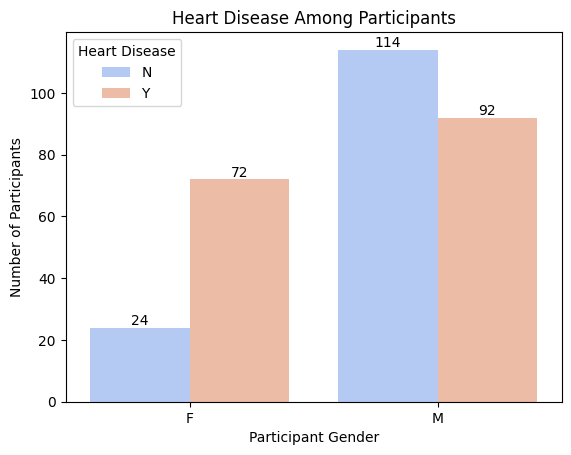

In [253]:
# Create a countplot for 'sex' against 'Heart Disease'
plots = sns.countplot(data=df, x='sex', hue='target', palette='coolwarm')  # Using the 'coolwarm' color palette
plt.legend(title="Heart Disease", loc='upper left')

# Add labels and title
for i in plots.containers:
    plots.bar_label(i, label_type='edge')  # Add labels at the edge of the bars

plots.set_title('Heart Disease Among Participants')
plots.set_xlabel('Participant Gender')
plots.set_ylabel('Number of Participants')

# Show the plot
plt.show()

# Add comments for better understanding
# The code creates a countplot for 'sex' against 'Heart Disease'
# Legends are added to indicate 'Heart Disease' and 'No Heart Disease'
# Labels are added at the edge of the bars for better readability
# The title, xlabel, and ylabel provide context and information about the plot
# The final plot is displayed using plt.show()


In [254]:
# Changing categorical variables back to numeric
df['sex'] = df['sex'].replace({'M': 1, 'F': 0}).astype('int')
df['target'] = df['target'].replace({'Y': 1, 'N': 0}).astype('int')
df['fbs'] = df['fbs'].replace({'Y': 1, 'N': 0}).astype('int')
df['exang'] = df['exang'].replace({'Y': 1, 'N': 0}).astype('int')

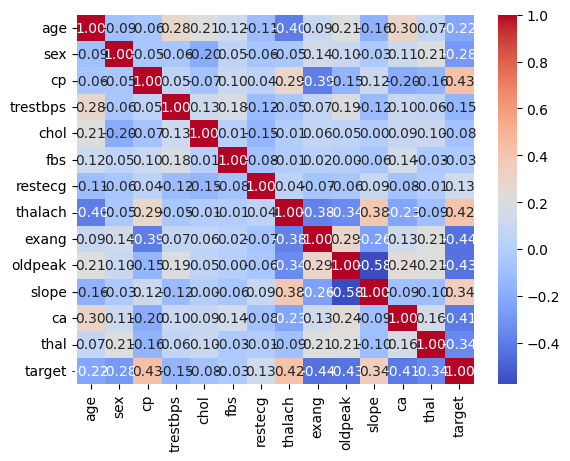

In [255]:
# Create correlation matrix for the df
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [256]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Splitting Features for train and Target for Test

In [257]:
# # Extract features (X) by dropping the 'target' column
X = df.drop(columns = "target", axis=1)

# Extract the target variable (y)
Y= df["target"]

In [258]:
X.shape

(302, 13)

In [259]:
Y.shape

(302,)

#### Splitting Data in Training and Test datasets

In [260]:
# Split the data into training and testing sets
# X_train: Features for training, X_test: Features for testing
# y_train: Target variable for training, y_test: Target variable for testing
# test_size: Percentage of data to be used for testing (in this case, 30%)
# random_state: Seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [261]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [262]:
X.shape, X_train.shape, X_test.shape

((302, 13), (241, 13), (61, 13))

In [263]:
Y.shape, y_train.shape, y_test.shape

((302,), (241,), (61,))

## Model Training

### Logistic Regression

Accuracy on Training data:  85.89211618257261
Accuracy on Test data:  81.9672131147541
Confussion matrix
[[22  6]
 [ 5 28]]


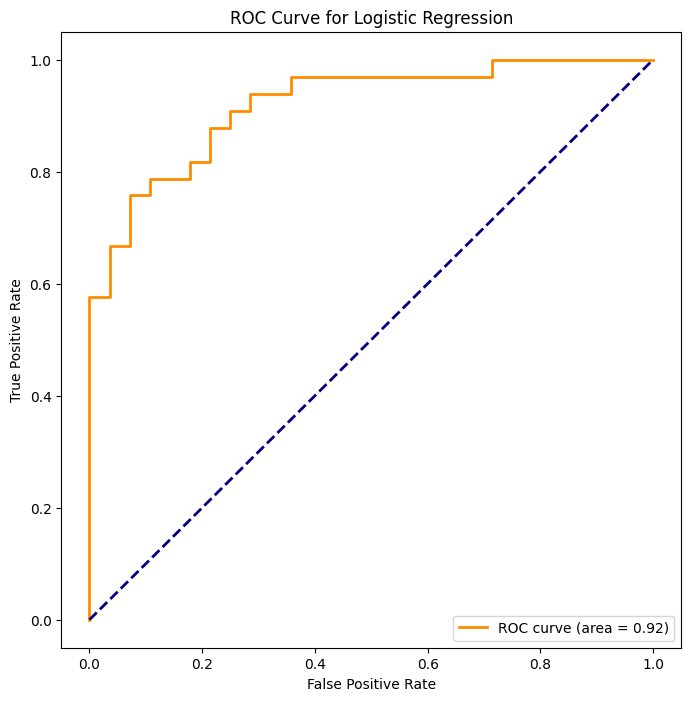

In [264]:
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
# training the model with training data
lr_model.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

#Confussion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(LR_conf_matrix)

y_test_probs = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {m1}')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

Accuracy on Training data:  84.23236514522821
Accuracy on Test data:  80.32786885245902
Confussion matrix
[[23  5]
 [ 7 26]]


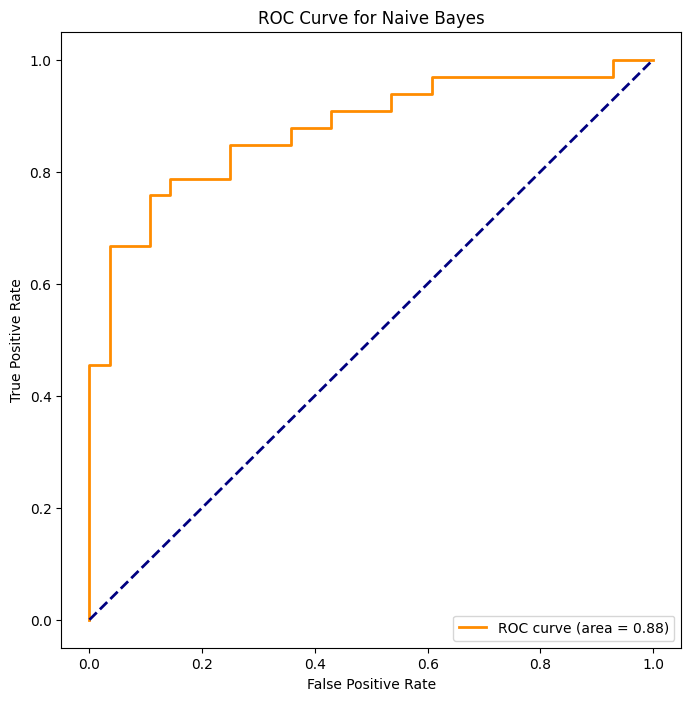

In [265]:
m2="Naive Bayes"

nb = GaussianNB()
# training the model with training data
nb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_nb*100)

#Confussion matrix
nb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(nb_conf_matrix)

# ROC curve
y_test_probs = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {m2}')
plt.legend(loc="lower right")
plt.show()

### Random Forest

Accuracy on Training data:  97.5103734439834
Accuracy on Test data:  85.24590163934425
Confussion matrix
[[24  4]
 [ 5 28]]


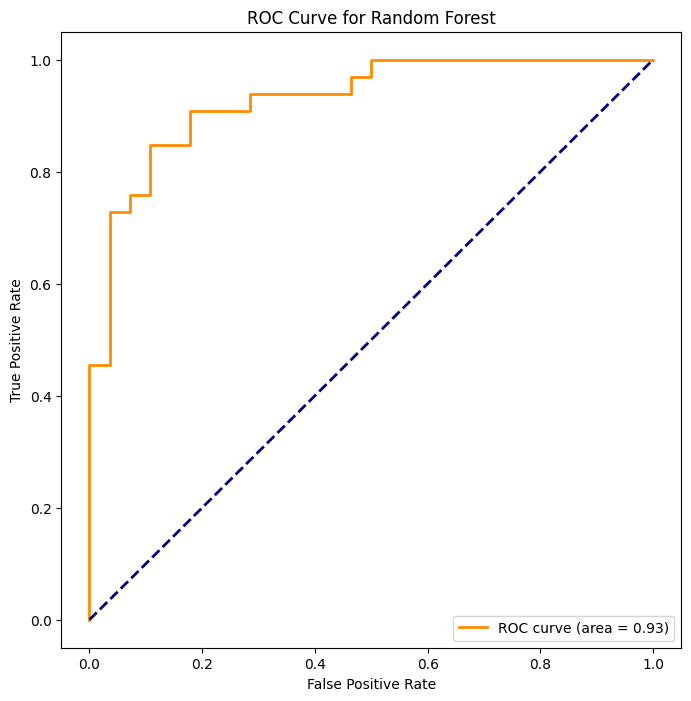

In [266]:
m3="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)  
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)

#Confussion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)

# ROC curve
y_test_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {m3}')
plt.legend(loc="lower right")
plt.show()

### Extreme Gradient Booster

Accuracy on Training data:  97.9253112033195
Accuracy on Test data:  80.32786885245902
Confussion matrix
[[23  5]
 [ 7 26]]


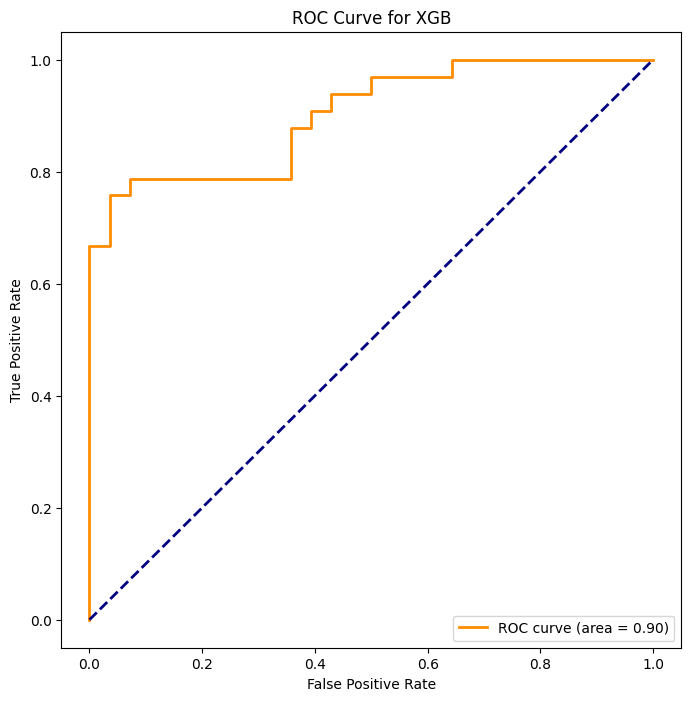

In [267]:
m4="XGB"
Egb = GradientBoostingClassifier(n_estimators=100, subsample= 0.2, min_samples_leaf=2,max_depth=5,random_state=2,max_features="sqrt")
# training the model with training data
Egb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = Egb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = Egb.predict(X_test)
test_data_accuracy_egb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_egb*100)

#Confussion matrix
Egb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(Egb_conf_matrix)

# ROC curve
y_test_probs = Egb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {m4}')
plt.legend(loc="lower right")
plt.show()

### K-NN

Accuracy on Training data:  83.40248962655602
Accuracy on Test data:  86.88524590163934
Confusion Matrix
[[22  6]
 [ 2 31]]


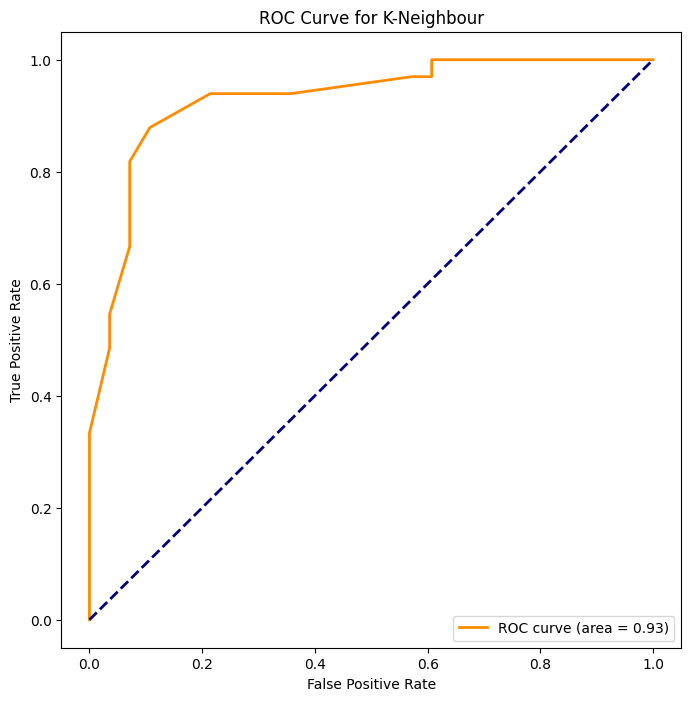

In [268]:
m5="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)
#Confusion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

# ROC curve
y_test_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {m5}')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine

Accuracy on Training data:  95.850622406639
Accuracy on Test data:  85.24590163934425
Confusion Matrix
[[24  4]
 [ 5 28]]


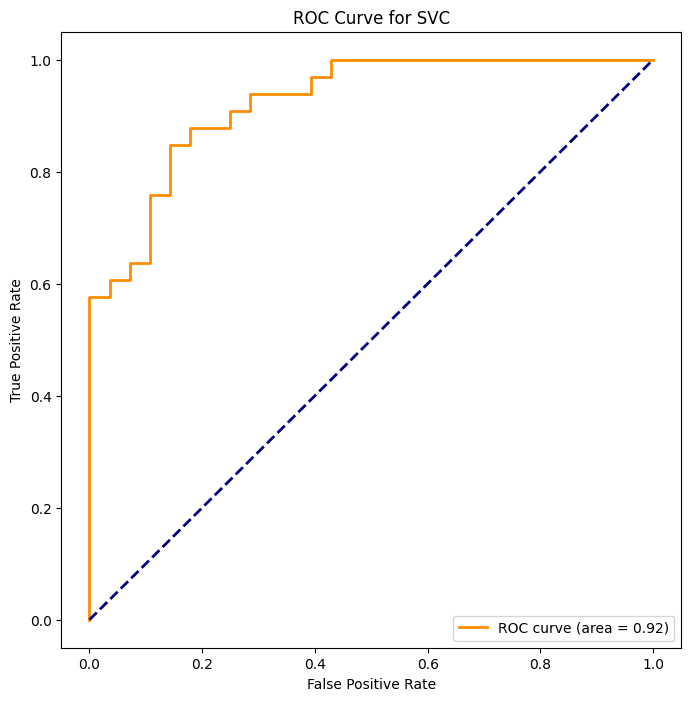

In [269]:
m6="SVC"
svc = SVC(C=5,kernel="rbf")
svc.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= svc.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= svc.predict(X_test)
test_data_accuracy_svc=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_svc*100)
#Confussion matrix
knn_confusion_matrix =  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

# ROC curve
y_test_probs = svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {m7}')
plt.legend(loc="lower right")
plt.show()

In [270]:
results = {"Models": [m1, m2, m3 ,m4, m5, m6],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf,test_data_accuracy_egb, test_data_accuracy_knn, test_data_accuracy_svc]}
    
for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]

    
result_df=pd.DataFrame(results)

In [271]:
result_df

,Models,Accuracy
0,Logistic Regression,81.967213
1,Naive Bayes,80.327869
2,Random Forest,85.245902
3,XGB,80.327869
4,K-Neighbour,86.885246
5,SVC,85.245902


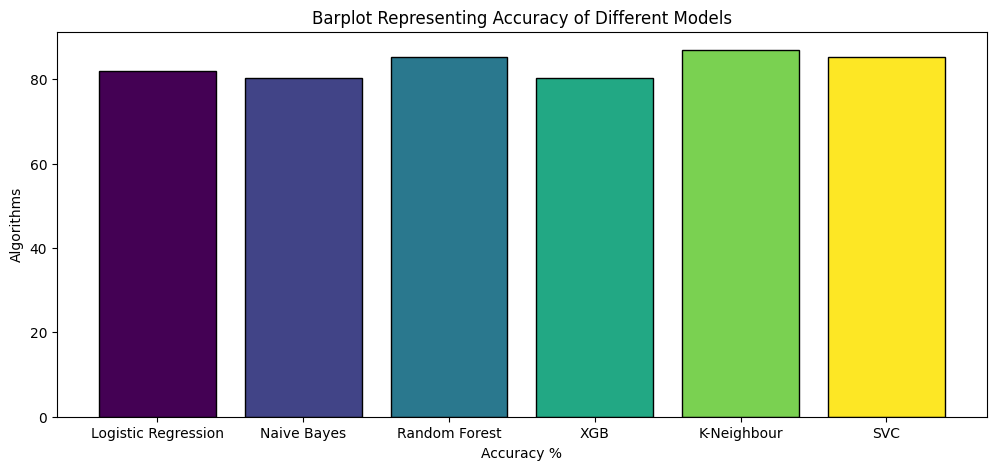

In [272]:
# Generate a set of colors using the 'viridis' colormap for each model
colors = plt.cm.viridis(np.linspace(0, 1, len(result_df)))

# Set up the plot with appropriate size
plt.figure(figsize=(12, 5))

# Add title and axis labels
plt.title("Barplot Representing Accuracy of Different Models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")

# Create a bar plot with specified colors, edgecolor, and linewidth
plt.bar(result_df['Models'], result_df['Accuracy'], color=colors, edgecolor='black', linewidth=1)

# Show the plot
plt.show()

# The code generates a set of colors using the 'viridis' colormap for each model in the result_df
# The plot is set up with a specific size
# The title, xlabel, and ylabel provide context and information about the plot
# A bar plot is created using plt.bar with specified colors, edgecolor, and linewidth
# The final plot is displayed using plt.show()
